In [349]:
# interpréatation des deux graphiques des résidus.
# enlever la graduation sur les heatmap de matrice de confsion
# commenter courbe roc

<img src="Logo_OpenClassrooms.png" width="93.75" height="56.25">

<h1 style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 26px;text-align: center; color: #B21807;">Parcours data analyst, projet 10 : Détecter des faux billets avec R ou Python.</h1>

***

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: #B21807;">Sommaire : </h1>

1. [Introduction](#1)
   - [A - Contexte](#1A)
   - [B - Déroulement du projet](#1B)
   - [C - Import des librairies necessaires et des tables](#1C)<br><br>
   
2. [Analyse exploratoire de la table 'billets' + traitements](#2)
   - [A - Analyse descriptive univariée](#2A)
   - [B - Analyse bivariée](#2B)
   - [C - Régréssion lineaire simple](#2C)   
   - [D - Régréssion lineaire multiple](#2D)      
   - [E - Analyse complémentaire](#2E)  <br><br>
   
3. [Modèles de prédiction ](#3)
   - [A - Prétrairement des données](#3A)
   - [B - Regression logistique](#3B)
   - [C - Clustering k-means](#3C)
   - [D - Comparaison des modèles et choix du modèle final](#3D)<br><br>
   
4. [Création et test de l'algorithme](#4)
   - [A - Création de l'algorithme](#4A)
   - [B - Test de l'algorithme sur le fichier d'evaluation](#4B)


***

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: #B21807;"><a name="1"></a>1 - Introduction :</h1>


<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="1A"></a>A - Contexte :</h1>

<img src="logo organisation.png" width="500" height="300">


<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Dans le cadre de ce projet, je travaille pour une organisation spécialisée dans la vérification et l'authentification des billets de banque : l’Organisation nationale de lutte contre le faux-monnayage (ONCFM). L'objectif principal de l'entreprise est d'assurer la fiabilité et la sécurité des transactions financières en détectant les faux billets en circulation.<br><br> 
    Pour ce faire, on m'a demandé de développer un modèle de prédiction capable de distinguer les vrais billets des faux en se basant sur leurs caractéristiques physiques. Les données fournies comprennent des mesures telles que la longueur, la hauteur, les marges et la diagonale des billets. Mon rôle consiste à analyser ces données, à sélectionner les techniques de modélisation appropriées, à entraîner et à évaluer les modèles, puis à choisir le modèle le plus performant pour être appliqué dans le processus de vérification de l'entreprise.</p>


<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="1B"></a>B - Déroulement du projet :</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Dans une première partie, j'effectuerai une analyse exploratoire du dataframe 'billets' ainsi qu'une régression linéaire afin de combler les valeurs manquantes de la colonne margin_low.<br> <br> 
Puis, dans un second temps, je créerai les modèles demandés (régression logistique et un algorithme k-means) et les entraînerai sur le dataframe 'billets' afin de comparer les résultats de ces derniers.<br> <br> 
Enfin, après avoir comparé les résultats des deux modèles, je choisirai le plus performant afin d'écrire une fonction permettant d'utiliser le modèle sur d'autres tables et le tester sur le dataframe d'évaluation 'billets_production'.

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="1C"></a>C - Import des librairies nécessaires et des tables : 
</h1>

In [350]:
# import des librairies necessaires.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# import de la table billets.
billets = pd.read_csv("billets.csv", sep=';')

***

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: #B21807;"><a name="2"></a>2 - Analyse exploratoire de la table 'billets' et traitements :</h1>

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="2A"></a>A - Analyse descriptive univariée : 
</h1>

'5 Première ligne de la table billets'

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


'Format des colonnes de la table billets'

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

'Stat descriptive de la table billets entière'

,Moyenne,Mediane,Valeurs manquantes,Doublons,Min,Max,Normal Distribution
diagonal,171.958440,171.96,0,1341,171.04,173.01,yes
height_left,104.029533,104.04,0,1345,103.14,104.88,yes
height_right,103.920307,103.92,0,1330,102.82,104.95,yes
margin_low,4.485967,4.31,37,1214,2.98,6.90,no
margin_up,3.151473,3.14,0,1377,2.27,3.91,no
length,112.678500,112.96,0,1164,109.49,114.44,no


'Stat descriptive de la table billets vrais'

,Moyenne,Mediane,Valeurs manquantes,Doublons,Min,Max,Normal Distribution
diagonal,171.987080,171.990,0,853,171.04,172.92,yes
height_left,103.949130,103.950,0,852,103.14,104.86,yes
height_right,103.808650,103.810,0,851,102.82,104.95,yes
margin_low,4.116097,4.110,29,846,2.98,5.04,yes
margin_up,3.052130,3.050,0,901,2.27,3.74,yes
length,113.202430,113.205,0,832,111.76,114.44,yes


'Stat descriptive de la table billets faux'

,Moyenne,Mediane,Valeurs manquantes,Doublons,Min,Max,Normal Distribution
diagonal,171.901160,171.91,0,367,171.04,173.01,yes
height_left,104.190340,104.18,0,397,103.51,104.88,yes
height_right,104.143620,104.16,0,382,103.43,104.95,yes
margin_low,5.215935,5.19,8,303,3.82,6.90,yes
margin_up,3.350160,3.35,0,414,2.92,3.91,yes
length,111.630640,111.63,0,291,109.49,113.85,yes


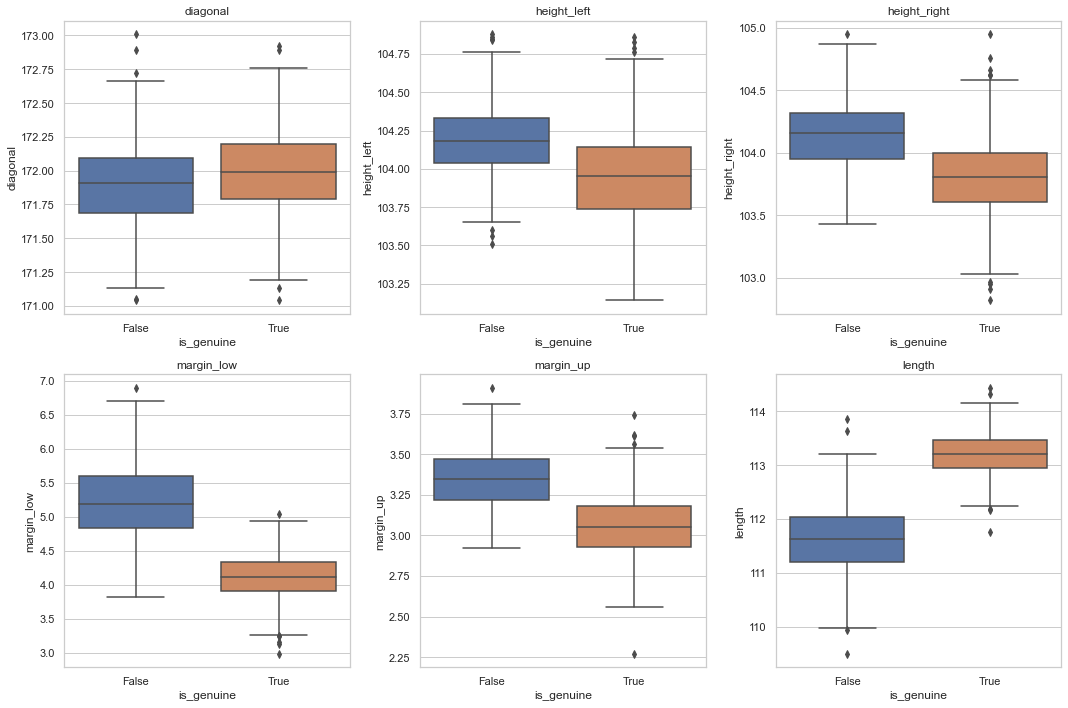

'Nombre de vrais et faux billets'

True     1000
False     500
Name: is_genuine, dtype: int64

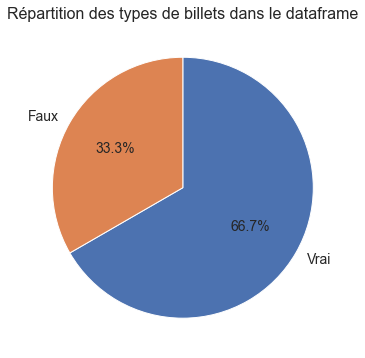

In [351]:
#Visualiser table
display('5 Première ligne de la table billets', billets.head(5))
# Connaitre le format de chaque colonnes de la table billets
display('Format des colonnes de la table billets', billets.dtypes)
# Création d'une fonction qui génère une table résumant les stats descriptive pour chaque variable d'un DataFrame.
def summarize_dataframe(df):
    numeric_columns = df.select_dtypes(include=['float', 'int']).columns
    summary_table = pd.DataFrame(columns=['Moyenne', 'Mediane', 'Valeurs manquantes', 'Doublons', 'Min', 'Max', 'Normal Distribution'])
    for col in numeric_columns:
        mean = df[col].mean()
        median = df[col].median()
        missing_values = df[col].isna().sum()
        duplicates = df[col].duplicated().sum()
        minimum = df[col].min()
        maximum = df[col].max()
        _, pvalue = stats.normaltest(df[col].dropna())
        if pvalue < 0.05:
            normal_dist = 'no'
        else:
            normal_dist = 'yes'
        summary_table.loc[col] = [mean, median, missing_values, duplicates, minimum, maximum, normal_dist]
    return summary_table

# Séparer les billets vrais des faux 
vrais = billets[billets['is_genuine'] == True]
vrais = vrais.drop('is_genuine', axis=1)
faux = billets[billets['is_genuine'] == False]
faux = faux.drop('is_genuine', axis=1)

# utilisation de la fonction : 
display('Stat descriptive de la table billets entière')
display(summarize_dataframe(billets))
print()
display('Stat descriptive de la table billets vrais')
display(summarize_dataframe(vrais))
print()
display('Stat descriptive de la table billets faux')
display(summarize_dataframe(faux))
#Créer des boxplots pour chaque variable par groupe ( vrais et faux billets).
n_cols = 3
n_rows = int(np.ceil(len(billets.columns[1:]) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, col in enumerate(billets.columns[1:]):
    ax = axes.flatten()[i]
    sns.boxplot(data=billets, x='is_genuine', y=col, ax=ax)
    ax.set_title(col)
for i in range(len(billets.columns[1:]), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Connaitre la répartition des vrais et faux billets au seins du df
# Compter le nombre de vrais et faux billets :
display('Nombre de vrais et faux billets', billets["is_genuine"].value_counts())
# Filtrer les données pour obtenir seulement la colonne "is_genuine"
genuine_data = billets["is_genuine"]
# Compter le nombre de billets vrais et faux
genuine_counts = genuine_data.value_counts()
# Définir les labels pour le pie chart
labels = ["Vrai", "Faux"]
# Créer le pie chart
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_palette("deep")
ax.pie(genuine_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 14})
# Ajouter un titre
plt.title('Répartition des types de billets dans le dataframe', fontsize=16)
plt.show()

In [352]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
À l'issue de cette analyse univariée, on peut retenir les points suivants :
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Nombre de billets : 1500. 1000 vrais (66,7%), 500 faux (33,3%).<br>
- Toutes les variables numériques sont bien au format float.<br>
- La variable margin_low possède 37 valeurs manquantes.<br>
- Grâce aux boxplots, on peut voir que les vrais et faux billets se distinguent par certaines variables (length et margin_low surtout), alors que d'autres restent similaires (diagonal, height_left, height_right, margin_up).<br><br>

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="2B"></a>B - Analyse bivariée : 
</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
L'objectif de cette partie est d'analyser les corrélations possibles entre la variable margin_low et les autres afin d'effectuer une régression linéaire pour prédire les valeurs manquantes.

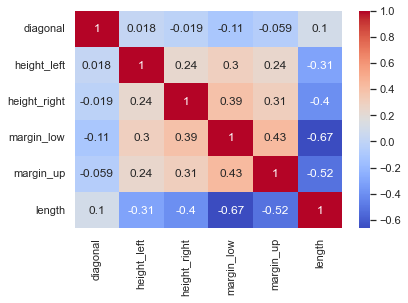

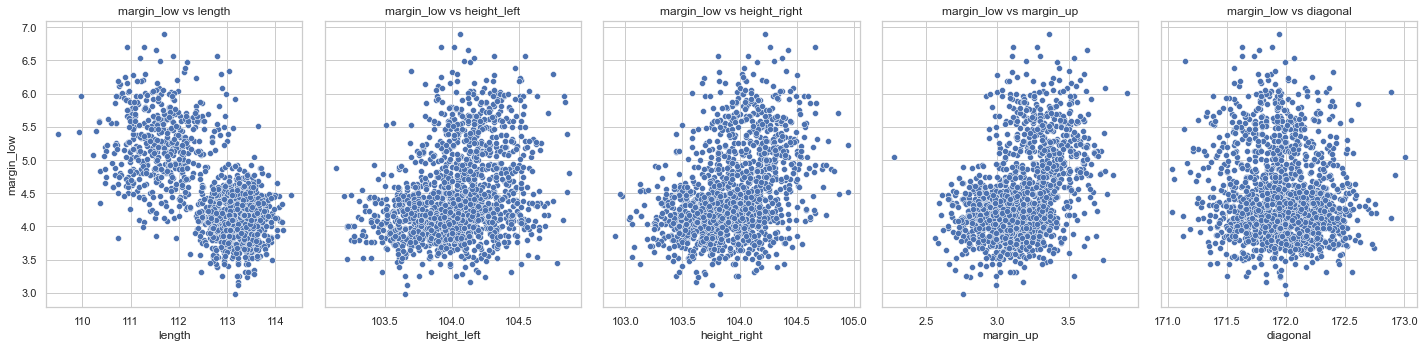

In [353]:
# Afficher la matrice des correlations entre les variables du df billets

# Supprimer les lignes avec des valeurs manquantes
data_clean = billets.dropna()
# Calculer la matrice de corrélation
corr_matrix = data_clean.select_dtypes(include='number').corr()
# Afficher la matrice de corrélation avec Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


# Visualisation des scaters pour la vaiable margin_low

# Liste des variables indépendantes
independent_vars = ['length', 'height_left', 'height_right', 'margin_up', 'diagonal']
# Création des scatter plots
fig, axes = plt.subplots(1, len(independent_vars), figsize=(20, 5), sharey=True)
for idx, var in enumerate(independent_vars):
    sns.scatterplot(data=billets, x=var, y='margin_low', ax=axes[idx])
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('margin_low')
    axes[idx].set_title(f'margin_low vs {var}')
plt.tight_layout()
plt.show()

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Grâce à la matrice des corrélations, on peut observer une relation négative modérée (-0,67) entre margin_low et length. C'est cette dernière qui possède la corrélation linéaire la plus significative avec margin_low, c'est donc elle que nous utiliserons pour notre régression linéaire.

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="2C"></a>C - Régréssion lineaire simple :</h1>

[4.42755559 4.28056693 4.35659555 4.18426401 4.6455043  4.20960688
 4.17412686 4.13864684 4.3464584  4.3464584  4.33632125 3.81932664
 3.99165818 4.40221272 4.42755559 4.18426401 4.49851564 4.62016143
 4.2856355  4.11330397 3.59124078 4.14371541 4.0068639  4.18426401
 3.90549241 3.97645245 4.43262417 4.48330991 4.13357827 4.89386446
 4.63029858 5.18784178 5.22839038 4.68098432 5.6845621  5.09660744
 5.08647029]


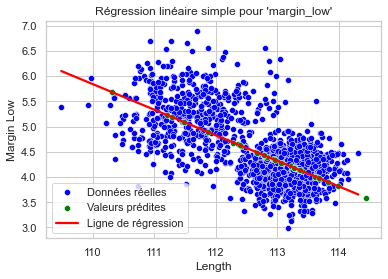

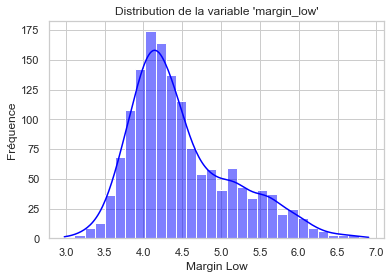

Valeurs manquantes is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64
RMSE:  0.494556474556812
R²:  0.4445592708293491
Test d'homoscédasticité (Breusch-Pagan) p-value: 5.9965405710468075e-15
Test d'indépendance des résidus (Durbin-Watson): 1.8655253979522606
Test de normalité des résidus (Shapiro-Wilk) p-value: 2.3925759377180222e-12


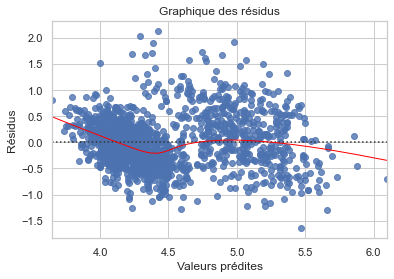

In [354]:
# Régréssion lineaire simple

# création d'un dataframe pour le resultat regression lineaire simple
billets_reglin_simple = billets.copy()
# Supprimer les lignes avec des valeurs manquantes
data_clean = billets_reglin_simple.dropna()
# Séparez les variables indépendantes et dépendantes
X_train = data_clean[['length']]
y_train = data_clean['margin_low']
# Créez le modèle de régression linéaire
linear_model = LinearRegression()
# Entraînez le modèle avec les données d'entraînement
linear_model.fit(X_train, y_train)
# Calculez les prédictions pour les données d'entraînement
y_train_pred = linear_model.predict(X_train)

# Identifiez les lignes avec des valeurs manquantes dans 'margin_low'
missing_margin_low = billets_reglin_simple['margin_low'].isna()
# Sélectionnez la variable indépendante 'length' pour ces lignes
X_missing = billets_reglin_simple[missing_margin_low][['length']]
# Utilisez le modèle entraîné pour prédire les valeurs manquantes de 'margin_low'
predicted_margin_low = linear_model.predict(X_missing)
# Remplacez les valeurs manquantes de 'margin_low' par les valeurs prédites :
billets_reglin_simple.loc[missing_margin_low, 'margin_low'] = predicted_margin_low
# afficher les valeurs trouvées
print(predicted_margin_low)

# Afficher les points de données
sns.scatterplot(x=X_train.values.ravel(), y=y_train.values.ravel(), color='blue', label='Données réelles')
sns.scatterplot(x=X_missing.values.ravel(), y=predicted_margin_low, color='green', label='Valeurs prédites')
# Afficher la ligne de régression
sns.regplot(x=X_train.values.ravel(), y=y_train_pred, color='red', scatter=False, label='Ligne de régression')
plt.title("Régression linéaire simple pour 'margin_low'")
plt.xlabel("Length")
plt.ylabel("Margin Low")
plt.legend()
plt.show()

# Afficher la distribution de la variable 'margin_low'
sns.histplot(data=billets_reglin_simple, x='margin_low', kde=True, bins=30, color='blue')
plt.title("Distribution de la variable 'margin_low'")
plt.xlabel("Margin Low")
plt.ylabel("Fréquence")
plt.show()

# vérifier qu'il n'y a plus de val manquantes
print('Valeurs manquantes',billets_reglin_simple.isna().sum())
# Ajustez le modèle de régression linéaire en utilisant statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
# Récupérez les résidus
residuals = model.resid

# Calculez les métriques d'évaluation (RMSE et R²)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)
print("RMSE: ", rmse)
print("R²: ", r2)
# Test d'homoscédasticité (Breusch-Pagan)
_, pval, _, _ = sms.het_breuschpagan(residuals, X_train)
print("Test d'homoscédasticité (Breusch-Pagan) p-value:", pval)
# Test d'indépendance des résidus (Durbin-Watson)
dw = sm.stats.stattools.durbin_watson(residuals)
print("Test d'indépendance des résidus (Durbin-Watson):", dw)
# Test de normalité des résidus (Shapiro-Wilk)
_, pval = stats.shapiro(residuals)
print("Test de normalité des résidus (Shapiro-Wilk) p-value:", pval)
# Afficher le graphique des résidus
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.show()

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: black;"><a name="2C"></a>Interprétation des resultats de la regression lineaire simple.</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Test d'homoscédasticité (Breusch-Pagan):
Ce test vérifie si la variance des résidus est constante pour toutes les valeurs de la variable indépendante. La p-valeur obtenue est très faible (5,9965405710468075e-15), bien inférieure au seuil de 0,05. Cela signifie que l'on peut rejeter l'hypothèse nulle d'homoscédasticité, ce qui indique une hétéroscédasticité présente dans les résidus. L'hétéroscédasticité peut entraîner des estimations inefficaces des coefficients de régression et des erreurs-types.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Test d'indépendance des résidus (Durbin-Watson):
Ce test vérifie si les résidus sont indépendants les uns des autres. Le score de Durbin-Watson varie de 0 à 4, où 2 indique l'absence de corrélation, des valeurs inférieures à 2 indiquent une corrélation positive et des valeurs supérieures à 2 indiquent une corrélation négative. Le score obtenu est de 1,8655253979522606, ce qui est proche de 2, suggérant qu'il n'y a pas de corrélation significative entre les résidus.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Test de normalité des résidus (Shapiro-Wilk):
Ce test vérifie si les résidus sont distribués normalement. La p-valeur obtenue est très faible (2,3925759377180222e-12), inférieure au seuil de 0,05. Cela signifie que je peux rejeter l'hypothèse nulle de normalité, indiquant que les résidus ne sont pas normalement distribués. La non-normalité des résidus peut entraîner des estimations biaisées des erreurs-types et affecter les tests d'hypothèses.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- RMSE (Root Mean Squared Error) :
Mesure d'erreur qui indique la différence moyenne entre les valeurs prédites et les valeurs réelles. le RMSE est d'environ 0.495. Cela signifie que, en moyenne, les prédictions faites par le modèle ont une erreur de 0.495 par rapport aux valeurs réelles de 'margin_low', ce que j'estime correct.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- R² (Coefficient de détermination) :
Mesure de la qualité de l'ajustement du modèle aux données. Elle varie entre 0 et 1. ici, le R² est d'environ 0.445. Cela signifie que le modèle explique environ 44,5 % de la variation de la variable 'margin_low'. Un R² plus élevé est généralement préférable ( autour de 70 ou 80%), car il indique que le modèle explique une plus grande partie de la variation des données. 
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Dans l'ensemble, il semble que le modèle de régression linéaire simple ait une performance modérée pour prédire les valeurs manquantes de 'margin_low'. Je vais maintenant essayer d'appliquer une regression multiple afin d'essayer d'obtenir de meilleurs resultats.

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="2D"></a>D - Régréssion lineaire multiple :</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Pour effectuer cette régréssion lineaire je décide de prendre toute les variables ayant au moins une correlaton de 0,3 avec margin_low ('length', 'margin_up', 'height_right', 'height_left').
    


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     329.5
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          4.80e-202
Time:                        17:35:46   Log-Likelihood:                -1004.9
No. Observations:                1463   AIC:                             2020.
Df Residuals:                    1458   BIC:                             2046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4860      0.013    356.171      0.0

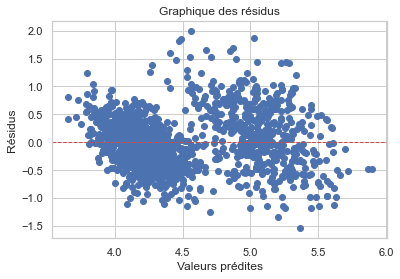

Test de Breusch-Pagan:
LM Statistic = 80.45052267064669
LM-Test p-value = 1.3981519938438025e-16
F-Statistic = 21.210246717604512
F-Test p-value = 5.0911563784079654e-17
[4.31800537 4.38775823 4.42170269 4.26353193 4.63638324 3.78974506
 4.17437915 4.1137667  4.20322737 4.2003525  4.2171008  3.7478685
 4.05962919 4.28309401 4.16302698 4.05106603 4.4481161  4.48613931
 4.35989586 4.12786559 3.60783273 4.32875964 4.09404198 4.18140174
 3.87395606 3.7390987  4.25377606 4.67366829 4.14015514 5.00827205
 4.73865027 5.03236798 5.07456514 4.79351042 5.70928748 5.26733586
 5.13675091]
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64
        feature       VIF
0        length  1.563099
1     margin_up  1.404082
2  height_right  1.229690
3   height_left  1.135245


In [355]:
# Régression linéaire multiple avec données standardisée

# Création d'un data pour resultat regression lineaire multiple
billets_reglin_multiple = billets.copy()
# Supprimer les lignes avec des valeurs manquantes
data_clean = billets_reglin_multiple.dropna()
# Séparer les variables indépendantes et dépendantes
X = data_clean[['length', 'margin_up', 'height_right', 'height_left']]
y = data_clean['margin_low']
# Standardiser les variables indépendantes
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
# Ajouter une constante aux variables indépendantes
X_standardized = sm.add_constant(X_standardized)
# Ajuster le modèle de régression linéaire multiple
model = sm.OLS(y, X_standardized).fit()
# Imprimer le résumé des résultats du modèle
print(model.summary())

# Calculer les prédictions à l'aide du modèle ajusté
y_pred = model.predict(X_standardized)
# Calculer les métriques d'évaluation (RMSE et R²)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print("RMSE: ", rmse)
print("R²: ", r2)

# Effectuer le test de Shapiro-Wilk pour vérifier la normalité des résidus
residuals = model.resid
shapiro_stat, shapiro_p = shapiro(residuals)
print("Test de Shapiro-Wilk: statistic =", shapiro_stat, ", p-value =", shapiro_p)

# Créer un graphique des résidus
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.show()

# Effectuer le test de Breusch-Pagan pour vérifier l'homoscédasticité
bp_test = het_breuschpagan(residuals, X_standardized)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("Test de Breusch-Pagan:")
for label, value in zip(labels, bp_test):
    print(label, "=", value)

# Identifier les lignes avec des valeurs manquantes dans 'margin_low'
missing_margin_low = billets_reglin_multiple['margin_low'].isna()
# Sélectionner les variables indépendantes pour ces lignes
X_missing = billets_reglin_multiple[missing_margin_low][['length', 'margin_up', 'height_right', 'height_left']]
# Standardiser les variables indépendantes manquantes
X_missing_standardized = scaler.transform(X_missing)
# Ajouter une constante aux variables indépendantes
X_missing_standardized = sm.add_constant(X_missing_standardized)
# Utiliser le modèle entraîné pour prédire les valeurs manquantes de 'margin_low'
predicted_margin_low = model.predict(X_missing_standardized)
# Remplacer les valeurs manquantes de 'margin_low' par les valeurs prédites
billets_reglin_multiple.loc[missing_margin_low, 'margin_low'] = predicted_margin_low
# Afficher les valeurs trouvées
print(predicted_margin_low)

# vérifier qu'il n'y a plus de val manquantes
print(billets_reglin_multiple.isna().sum())

# Calculer les VIF pour les variables indépendantes (sans la constante)
X_standardized_no_const = X_standardized[:, 1:]  # Exclure la colonne de constantes
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_standardized_no_const, i) for i in range(X_standardized_no_const.shape[1])]
# Affichez les résultats
print(vif_data)

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
R-squared (R²) : Le R² est de 0.475, ce qui signifie que le modèle explique environ 47,5 % de la variabilité de la variable dépendante "margin_low". Ce n'est pas un très bon score, il  montre qu'il y a encore une part importante de la variabilité qui n'est pas expliquée par les variables indépendantes choisies.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
RMSE : Le RMSE (Root Mean Squared Error) est de 0.4809. Il s'agit d'une mesure de l'erreur de prédiction du modèle. Dans ce cas, le RMSE est relativement faible, ce qui indique que les erreurs de prédiction sont plutôt petites.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Test de Shapiro-wilk : Dans notre cas, la statistique de test est de 0,9855 (arrondi) et la p-valeur est de 5,93e-11. Étant donné que la p-valeur est très faible (inférieure au seuil de significativité généralement accepté de 0,05), on peut rejeter l'hypothèse nulle selon laquelle les résidus suivent une distribution normale. Cela signifie que les résidus ne sont pas normalement distribués, ce qui peut indiquer un problème avec le modèle de régression linéaire multiple .
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Graphique des résidus : 
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Test de significativité des coefficients :  tous les coefficients du modèle de régression linéaire multiple sont statistiquement significatifs, ce qui signifie que toutes les variables indépendantes ont un effet significatif sur la variable dépendante (P>|t| toujours inferieur à 0.05). 
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Vérification de la multicolinéarité ( score VIF) : Le facteur d'inflation de la variance pour chaque variable est proche de 1 ce qui indique que l'on a pas de problème de multicolinéarit entre les variables indépendantes.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Durbin-Watson : La statistique Durbin-Watson est de 1.885, ce qui est proche de 2. Cela suggère qu'il n'y a pas de problème d'autocorrélation entre les erreurs du modèle. Les erreurs sont donc indépendantes les unes des autres.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Test de Breusch-Pagan :  les p-valeurs du test LM et du test F sont toutes deux très proches de 0 et inférieures au seuil de significativité de 0,05. Cela signifie que l'on peut rejeter l'hypothèse nulle et conclure qu'il y a une preuve d'hétéroscédasticité dans le modèle de régression.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
ll y a quelques problèmes avec ce modèle :<br><br>
- Le R² est assez faible (0.475).<br>
- Le modèle n'explique pas une grande partie de la variabilité de la variable dépendante.<br>
- Le test de Shapiro-Wilk indique que les résidus ne sont pas normalement distribués.<br>
- Le test de Breusch-Pagan montre qu'il y a de l'hétéroscédasticité dans le modèle. <br>
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
il y a aussi des aspects positifs : <br><br>
- absence de multicolinéarité et d'autocorrélation. 
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Pour finir, j'estime que le modèle de régression linéaire multiple n'est que moyennement fiable. La régression linéaire est une étape obligatoire de ce projet, je vais donc conserver ces résultats. En temps normal, il aurait été plus simple de supprimer ces 37 lignes contenant des valeurs manquantes, car elles ne représentent qu'une petite proportion du total (1500 lignes).

In [356]:
# Rempalcement du df initial par le df obtenue grace à la reg lineaire multiple.
billets = billets_reglin_multiple.copy()
billets.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="2E"></a>E - Analyse complémentaire :</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Dans cette partie, nous allons vérifier s'il est possible de constater une différence entre les valeurs des vrais et faux billets sur les pairplots, les distributions et le graphique des individus d'une ACP. Je considère cette étape comme nécessaire, car elle nous permettra de voir s'il existe des différences entre ces deux groupes. Si c'est le cas, nos modèles pourront remplir correctement leur fonction (différencier les vrais billets des faux).

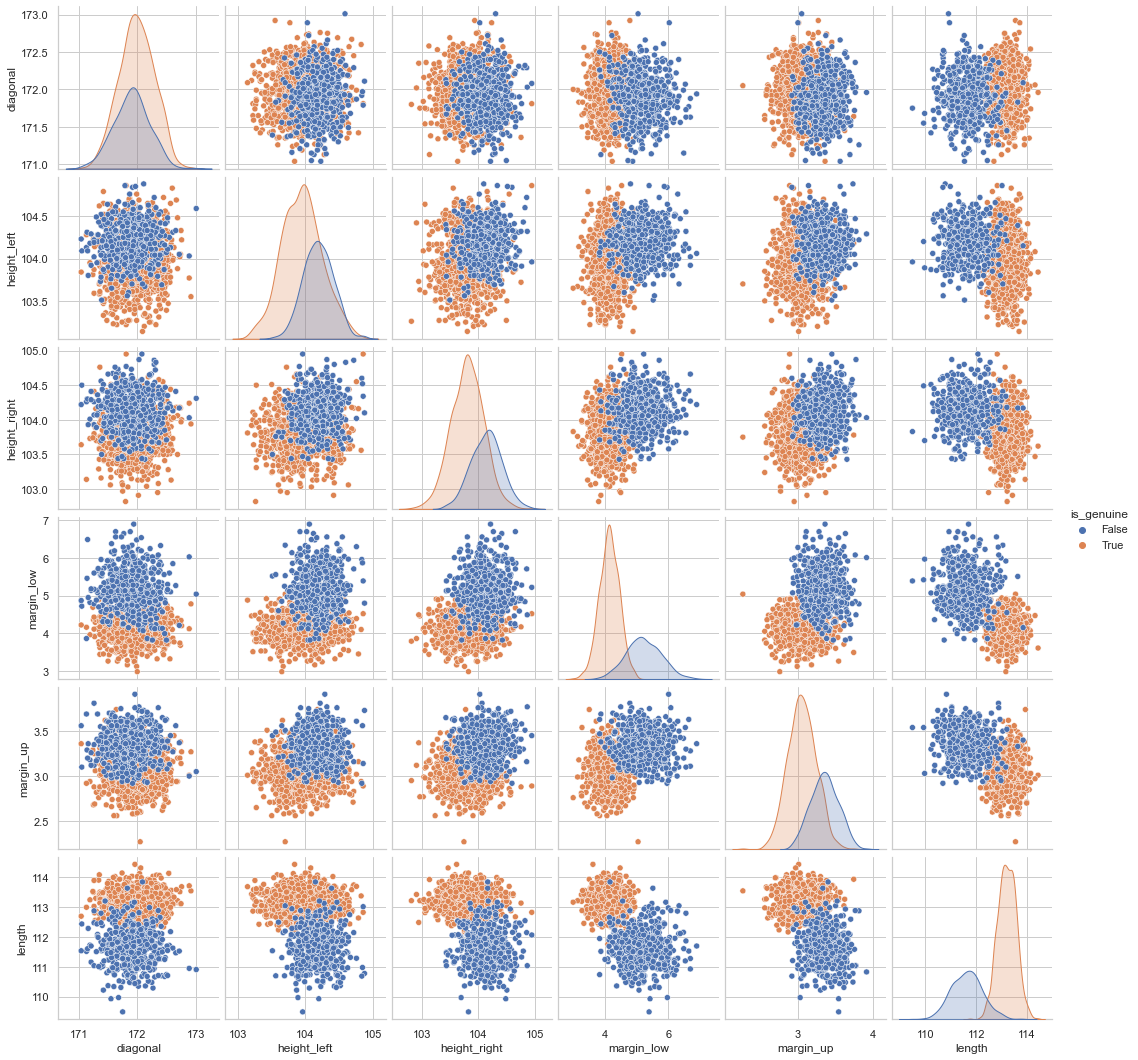

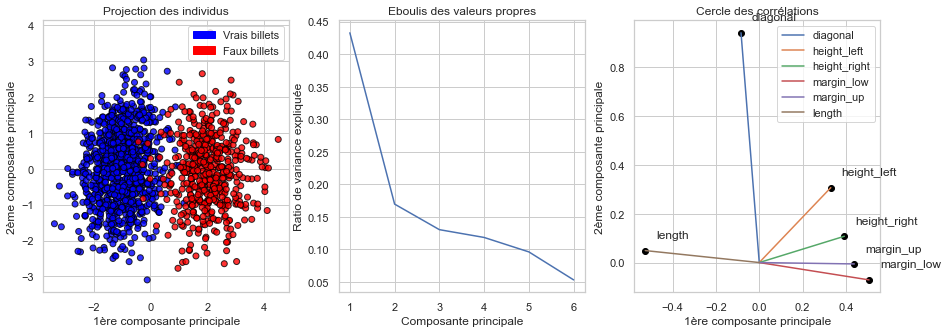

In [357]:
# Créez un pairplot en utilisant Seaborn
sns.pairplot(data=billets, hue='is_genuine')
# Affichez le graphique
plt.show()

# Effectuer une ACP 
# Sélectionner les variables de dimensions
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualiser les résultats
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Afficher le graphique des individus avec couleurs selon le type de billet
colors = ['blue' if is_genuine else 'red' for is_genuine in billets['is_genuine']]
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], color=colors, alpha=0.8, edgecolor='black')
axs[0].set_xlabel('1ère composante principale')
axs[0].set_ylabel('2ème composante principale')
axs[0].set_title('Projection des individus')
# Légende
handles = [mpatches.Patch(color='blue', label='Vrais billets'),           mpatches.Patch(color='red', label='Faux billets')]
axs[0].legend(handles=handles)

# Afficher l'éboulis des valeurs propres
axs[1].plot(range(1, 7), pca.explained_variance_ratio_)
axs[1].set_xlabel('Composante principale')
axs[1].set_ylabel('Ratio de variance expliquée')
axs[1].set_title('Eboulis des valeurs propres')

# Afficher le cercle des corrélations
for i, (var, x, y) in enumerate(zip(X.columns, pca.components_[0, :], pca.components_[1, :])):
    axs[2].plot([0, x], [0, y], label=var)
    axs[2].scatter(x, y, color='black')
    axs[2].annotate(var, xy=(x, y), xytext=(x+0.05, y+0.05), fontsize=12)
axs[2].set_xlabel('1ère composante principale')
axs[2].set_ylabel('2ème composante principale')
axs[2].set_title('Cercle des corrélations')
axs[2].legend()

plt.show()

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Grâce aux pairplots, nous observons une différence entre les groupes sur chaque combinaison de variables.<br>
L'ACP révèle que les deux ensembles possèdent des caractéristiques générales distinctes, se différenciant principalement par la variable "length" (les vrais billets étant plus longs que les faux) ainsi que par les variables "height_left", "height_right", "margin_up" et "margin_low" (valeurs plus élevées pour les faux billets). Cette analyse complémentaire nous assure que les modèles demandés, tels que la régression logistique et le k-means, seront capables de différencier ces deux groupes.

***

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: #B21807;"><a name="3"></a>3 - Création des modèles de prédiction :</h1>


<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="3A"></a>A - Prétraitement des données :</h1>

In [358]:
# Séparer les données en variables indépendantes (X) et dépendantes (y)
X = billets.drop('is_genuine', axis=1)
y = billets['is_genuine']

In [359]:
#Normaliser les données si nécessaire
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="3B"></a>B - Régression logistique:</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Diviser les données en ensembles d'entraînement et de test :<br><br>
L'objectif de cette étape est de séparer le jeu de données en deux parties distinctes : un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement sera utilisé pour entraîner les modèles prédictifs, tandis que l'ensemble de test servira à évaluer leur performance. Cette séparation est cruciale pour estimer la performance des modèles sur des données inédites et éviter le surapprentissage (lorsque le modèle s'adapte trop bien aux données d'entraînement et ne généralise pas bien à de nouvelles données). Habituellement, on utilise une proportion de 70-80 % des données pour l'entraînement et 20-30 % pour les tests.

In [360]:
#Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [361]:
# Vérifier les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train) :", X_train.shape)
print("Dimensions de l'ensemble d'entraînement (y_train) :", y_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)
print("Dimensions de l'ensemble de test (y_test) :", y_test.shape)

# Cette étape sert à vérifier et afficher les dimensions (nombre de lignes et de colonnes) des ensembles d'entraînement et de test pour les variables indépendantes (X_train et X_test) et dépendantes (y_train et y_test).
# L'affichage des dimensions  permet de s'assurer que la séparation des données a été effectuée correctement et que les proportions d'entraînement et de test sont conformes à ce qu'on attend. Cela donne également une idée de la taille des ensembles de données avec lesquels on travaille lors de l'entraînement et de l'évaluation des modèles prédictifs.
# En résumé, cette étape sert principalement à vérifier que les ensembles d'entraînement et de test ont été créés correctement et à nous informer sur leur taille.

Dimensions de l'ensemble d'entraînement (X_train) : (1050, 6)
Dimensions de l'ensemble d'entraînement (y_train) : (1050,)
Dimensions de l'ensemble de test (X_test) : (450, 6)
Dimensions de l'ensemble de test (y_test) : (450,)


<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Entraîner un modèle de régression logistique sur l'ensemble d'entraînement (X_train et y_train).

In [362]:
# Entraîner un modèle de régression logistique sur l'ensemble d'entraînement
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Évaluer le modèle sur l'ensemble de test (matrice de confusion, précision, rappel, score F1, etc.) :<br><br>
Après avoir entraîné le modèle de régression logistique, on évalue sa performance en utilisant l'ensemble de test (X_test et y_test). on peut calculer les métriques d'évaluation telles que la matrice de confusion, la précision, le rappel, le score F1, , pour déterminer l'efficacité du modèle à prédire correctement les vrais et faux billets.

Matrice de confusion :
[[158   3]
 [  1 288]]
Précision : 0.9896907216494846
Rappel : 0.9965397923875432
Score F1 : 0.993103448275862
Exactitude : 0.9911111111111112


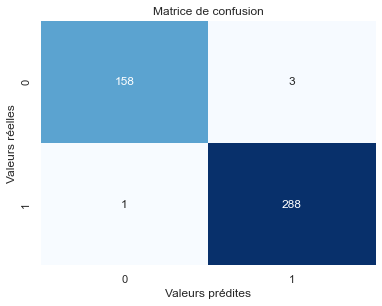

In [363]:
#Évaluer le modèle sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_mat)
# Heatmap pour la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax, cbar=False)
ax.set_xlabel('Valeurs prédites')
ax.set_ylabel('Valeurs réelles')
ax.set_title('Matrice de confusion')

# Précision
precision = precision_score(y_test, y_pred)
print("Précision :", precision)
# Rappel
recall = recall_score(y_test, y_pred)
print("Rappel :", recall)
# Score F1
f1 = f1_score(y_test, y_pred)
print("Score F1 :", f1)
# Autres métriques (par exemple, l'exactitude)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude :", accuracy)

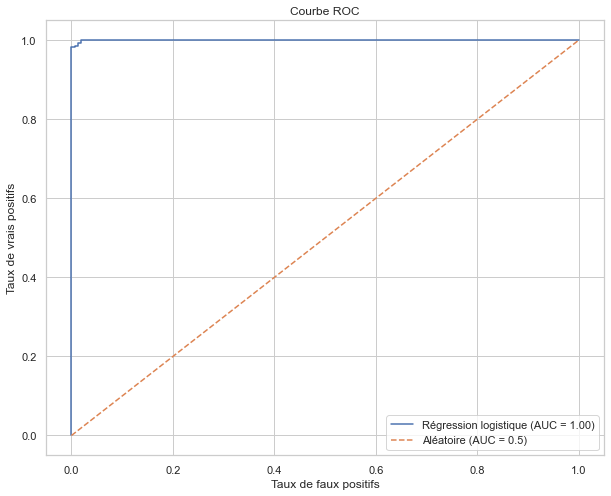

In [364]:
# Calculer les probabilités de la classe positive (is_genuine)
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculer les taux de vrais positifs et de faux positifs
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculer l'AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Afficher la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="Régression logistique (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Aléatoire (AUC = 0.5)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Précision : 0.9897 - La précision indique la proportion de vrais positifs parmi toutes les instances classées comme positives. Dans ce cas, environ 98.97 % des billets classés comme faux se sont réellement avérés être des faux billets.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Rappel : 0.9965 - Le rappel indique la proportion de vrais positifs parmi toutes les instances réellement positives. Ici, environ 99.65 % des faux billets réels ont été correctement identifiés par le modèle.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Score F1 : 0.9931 - Le score F1 est la moyenne harmonique de la précision et du rappel. Il est utilisé pour évaluer la qualité globale du modèle en tenant compte à la fois de la précision et du rappel. Dans ce cas, le score F1 est de 99.31 %, ce qui indique une bonne performance du modèle.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Exactitude : 0.9911 - L'exactitude mesure la proportion de prédictions correctes par rapport au total des prédictions. Ici, l'exactitude est de 99.11 %, ce qui signifie que le modèle a correctement classé environ 99.11 % des billets dans l'ensemble de test.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Dans l'ensemble, ces résultats montrent que le modèle de régression logistique a très bien performé sur l'ensemble de test pour identifier les faux billets. Les valeurs élevées de la précision, du rappel, du score F1 et de l'exactitude indiquent que le modèle est à la fois précis et complet dans ses prédictions.

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="3C"></a>C - Clustering k-means:</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Pour commencer, je vais générer un graphique du coude pour voir si, selon lui, le nombre optimal de cluster est bien 2.

C:\Users\DATA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


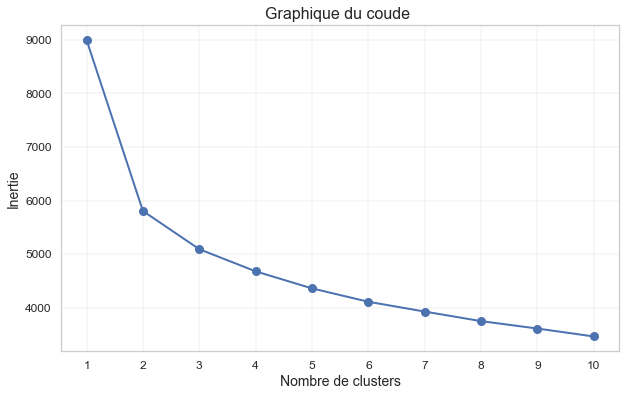

In [365]:
# Calculer les inerties pour différents nombres de clusters (de 1 à 10)
inertias = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

# Générer le graphique du coude
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters', fontsize=14)
plt.ylabel('Inertie', fontsize=14)
plt.title("Graphique du coude ", fontsize=16)
plt.xticks(range(1, 11), fontsize=12)
plt.yticks(fontsize=12)

# Ajouter une grille d'arrière-plan
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Grace au graphique, on voit que le nombre de cluster idéale est de 2.

***

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Création et execution du modèle d'entrainement k-means :<br>
Cette étape crée un objet KMeans avec 2 clusters (pour distinguer les vrais et les faux billets) et entraîne l'algorithme sur les dimensions géométriques normalisées.

In [366]:
# Entraînez l'algorithme k-means avec k=2 (pour deux groupes, vrais et faux billets) :
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Création d'une colonne d'étiquette pour le resultat du clustering k-means :<br>
    Cette ligne ajoute une nouvelle colonne cluster au DataFrame billets, qui contient les étiquettes de cluster (0 ou 1) attribuées par l'algorithme k-means.

In [367]:
#Ajoutez les étiquettes des clusters (0 ou 1) au DataFrame initial :
billets['cluster'] = kmeans.labels_

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Déterminez à quel cluster correspond les vrais billets et les faux billets :<br>
    Cette partie du code calcule la proportion de vrais billets dans chaque cluster et attribue les étiquettes true_label et false_label en fonction des proportions. Le cluster avec la plus grande proportion de vrais billets sera considéré comme le cluster des vrais billets.


In [368]:
# Calculez la proportion de vrais billets dans chaque cluster
cluster_0 = billets[billets['cluster'] == 0]
cluster_1 = billets[billets['cluster'] == 1]

genuine_ratio_0 = cluster_0['is_genuine'].mean()
genuine_ratio_1 = cluster_1['is_genuine'].mean()

# Attribuez les étiquettes aux clusters en fonction des proportions : 
if genuine_ratio_0 > genuine_ratio_1:
    true_label = 0
    false_label = 1
else:
    true_label = 1
    false_label = 0

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Ajout d'une colonne 'predicted_is_genuine'
Cette ligne crée une nouvelle colonne predicted_is_genuine dans le DataFrame billets qui contient les prédictions de l'algorithme k-means (True pour les vrais billets et False pour les faux billets) en utilisant le mappage des étiquettes de cluster déterminé précédemment.

In [369]:
# Ajoutez une colonne 'predicted_is_genuine' au DataFrame pour stocker les prédictions : 
billets['predicted_is_genuine'] = billets['cluster'].map({true_label: True, false_label: False})

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Évaluer le modèle sur l'ensemble de test (matrice de confusion,exactitude, précision, rappel, score F1, etc.) :<br><br>
Après avoir entraîné le modèle k-means, on évalue sa performance en utilisant l'ensemble de test (X_test et y_test). on peut calculer les métriques d'évaluation telles que la matrice de confusion, la précision, le rappel, le score F1, pour déterminer l'efficacité du modèle à prédire correctement les vrais et faux billets.

Matrice de confusion :
 [[486  14]
 [ 10 990]]
Exactitude (Accuracy) : 0.984
Rappel (Recall) : 0.99
Précision (Precision) : 0.9860557768924303
Score F1 : 0.9880239520958083


Text(0.5, 1.0, 'Matrice de confusion')

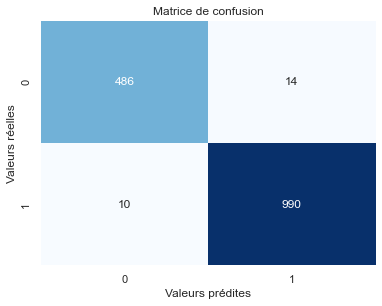

In [370]:
# Calcul des indicateurs
y_true = billets['is_genuine']
y_pred = billets['predicted_is_genuine']

confusion = confusion_matrix(y_true, y_pred)
exactitude = accuracy_score(y_true, y_pred)
rappel = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Affichage des résultats
print("Matrice de confusion :\n", confusion)
print("Exactitude (Accuracy) :", exactitude)
print("Rappel (Recall) :", rappel)
print("Précision (Precision) :", precision)
print("Score F1 :", f1)

# Heatmap pour la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', ax=ax, cbar=False)
ax.set_xlabel('Valeurs prédites')
ax.set_ylabel('Valeurs réelles')
ax.set_title('Matrice de confusion')

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Exactitude (Accuracy) :  0.984. Cela signifie que le modèle a correctement classé 98,4 % des billets.
<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Rappel (Recall) : 0.99. Cela signifie que le modèle a identifié correctement 99 % des vrais billets.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Précision (Precision) : 0.986. Cela signifie que, parmi les billets classés comme vrais par le modèle, 98,6 % sont effectivement vrais.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
- Score F1 : 0.988. Le score F1 est une mesure qui tient compte à la fois de la précision et du rappel. Un score F1 plus élevé indique un meilleur équilibre entre la précision et le rappel.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
les modèles non supervisés comme K-means n'utilisent pas les étiquettes lors de la formation, ce qui peut parfois conduire à des résultats moins précis que les modèles supervisés.

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="3D"></a>D - Comparaison des modèles et choix du modèle final</h1>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Régression logistique:

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Précision : 0.9897
Rappel : 0.9965
Score F1 : 0.9931
Exactitude : 0.9911<br>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
K-means:

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Précision : 0.986
Rappel : 0.99
Score F1 : 0.988
Exactitude : 0.984<br><br>

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
En comparant les deux modèles, on constate que la régression logistique a une performance légèrement meilleure sur tous les indicateurs (précision, rappel, score F1 et exactitude). Ceci est attendu car la régression logistique est un modèle de classification supervisé, conçu spécifiquement pour prédire des catégories en utilisant les étiquettes de données pendant l'apprentissage.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
Le modèle K-means, en tant que méthode non supervisée, obtient des résultats légèrement inférieurs, mais néanmoins assez proches de ceux de la régression logistique. Cela montre que le K-means est également capable de discriminer les vrais billets des faux billets en se basant sur la similarité des caractéristiques. Cependant, il est important de rappeler que les résultats obtenus avec le modèle K-means doivent être interprétés avec prudence, car il s'agit d'un modèle non supervisé qui ne prend pas en compte les étiquettes lors de la formation.

<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
En résumé, la régression logistique présente de meilleures performances pour ce problème de classification, c'est donc celui ci que nous utiliserons pour notre algorythme bien que le modèle K-means fournit également des résultats relativement bons malgré son approche non supervisée.





***

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: #B21807;"><a name="4"></a>4 - Création et test de l'algorithme
 :</h1>

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="4A"></a>A - Création de l'algorithme :</h1>

In [371]:
# Ecriture de la fonction : 
def predict_billets_proba(model, scaler, input_dataframe):
    # Préparez les données
    dimensions_production = input_dataframe[['diagonal','height_left','height_right','margin_low', 'margin_up','length']]
    scaled_dimensions_production = scaler.transform(dimensions_production)

    # Utilisez le modèle de régression logistique pour faire des prédictions
    predicted_is_genuine_production = model.predict(scaled_dimensions_production)
    predicted_proba = model.predict_proba(scaled_dimensions_production)[:, 1]

    # Ajoutez les prédictions et les probabilités au DataFrame initial
    input_dataframe['predicted_is_genuine'] = predicted_is_genuine_production
    input_dataframe['predicted_proba'] = predicted_proba
    
    return input_dataframe

<h1 style="font-family: 'Roboto', sans-serif; font-size: 22px; color: green;"><a name="4B"></a>B - Test de l'algorithme sur le fichier d'evaluation (billets_production.csv) ou sur un autre dataframe avec les mêmes variables :</h1>

In [380]:
# test sur le fichier billet_productions
# Charger un DataFrame depuis un fichier CSV
input_dataframe = pd.read_csv("billets_production.csv")

# Utilisez la fonction avec le DataFrame
predicted_billets = predict_billets_proba(logistic_model, scaler, input_dataframe)
display(predicted_billets)

# Enregistrer le DataFrame 'predicted_billets' au format CSV
predicted_billets.to_csv("predicted_billets_final.csv", index=False)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,predicted_is_genuine,predicted_proba
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.002958
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.000402
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.000480
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.957963
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.999814


<p style="text-align: justify; font-family: 'Roboto', sans-serif; font-size: 18px;">
On peut voir que le modèle a prédit la nature des billets en creant une colonne 'predicted_is_genuine' et en affichant la probabilité que le billet soit un vrai dans la colonne predicted_proba. L'algorithme semble fonctionel.